### Import Libraries

In [39]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [40]:
df  = pd.read_csv('loan_approval.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [41]:
# See for size of dataset i.e. (# rows, # columns)
print(df.shape)

(4269, 13)


In [42]:
# Check for missing values
print(f'Missing values: {df.isna().any().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')

Missing values: 0
Duplicated values: 0


In [43]:
# Finding out which column are categorical 
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values < 10:   # This is experimental 
        print(f'{col} has {df[col].nunique()} values')

 no_of_dependents has 6 values
 education has 2 values
 self_employed has 2 values
 loan_status has 2 values


In [44]:
# There were whitespaces in column name so,
df.columns = df.columns.str.strip()

In [45]:
# Check for the balance of target class
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

### Feature Engineering: Encoding

In [46]:
from sklearn.preprocessing import OrdinalEncoder

# Columns to encode
columns_to_encode = ['education', 'self_employed', 'loan_status']

# Initialize OrdinalEncoder
oe = OrdinalEncoder()

# Fit and transform only on selected columns
encoded_values = oe.fit_transform(df[columns_to_encode])

# Replace original columns with encoded values
df[columns_to_encode] = encoded_values

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,2,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,4,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0


### Input and Output

In [47]:
X = df.drop(['loan_id', 'loan_status'], axis= 1)
y = df['loan_status']

In [48]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000


### Split into Train and Test Set

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3415, 11) (854, 11)
(3415,) (854,)


### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [53]:
# print the scores on training and test set

print(f'Training set score using Entropy Criterion: {clf_gini.score(X_train, y_train):.4f}')
print(f'Test set score using Entropy Criterion:: {clf_gini.score(X_test, y_test):.4f}')

print(f'Training set score using Gini Criterion: {clf_gini.score(X_train, y_train):.4f}')
print(f'Test set score using Gini Criterion: {clf_gini.score(X_test, y_test):.4f}')

Training set score using Entropy Criterion: 0.9643
Test set score using Entropy Criterion:: 0.9637
Training set score using Gini Criterion: 0.9643
Test set score using Gini Criterion: 0.9637


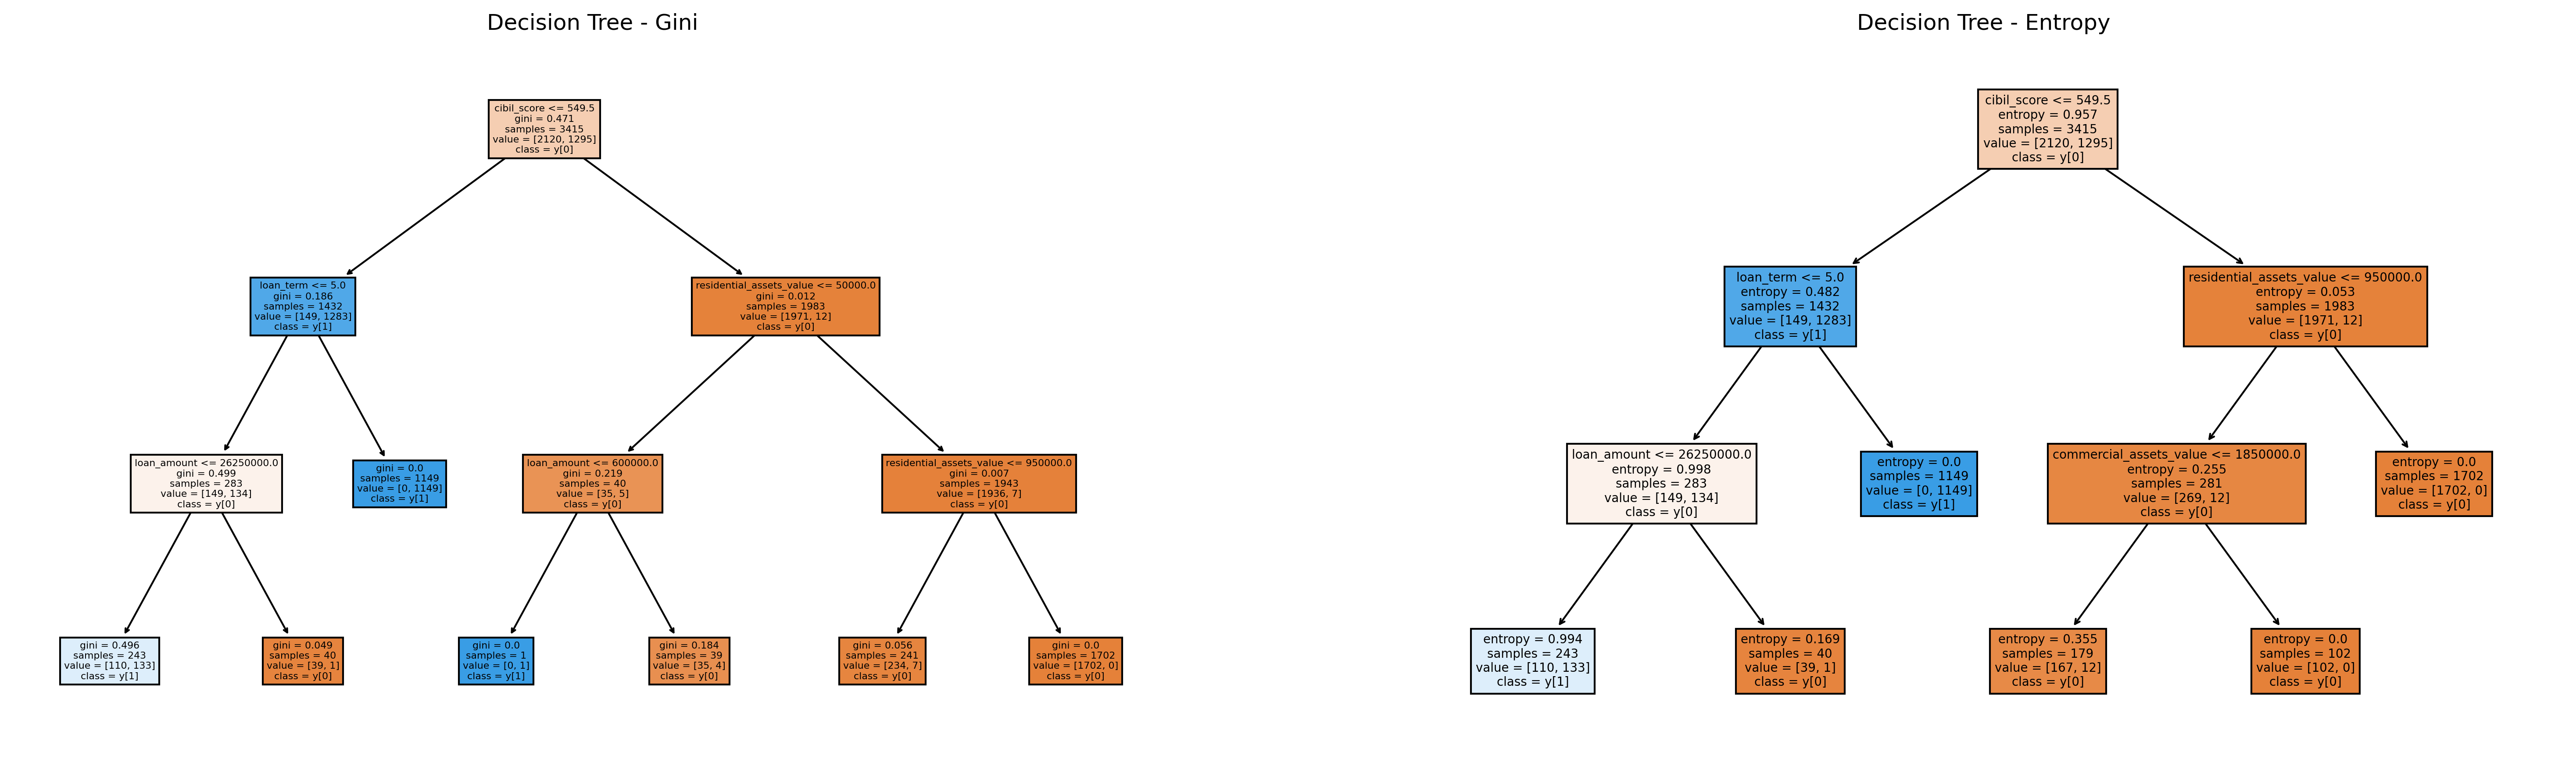

In [55]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 7), dpi=300)

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plot_tree(clf_gini, filled=True, feature_names=X_train.columns, class_names=True)
plt.title('Decision Tree - Gini')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plot_tree(clf_en, filled=True, feature_names=X_train.columns, class_names=True)
plt.title('Decision Tree - Entropy')

plt.show()

### Confusion Matrix

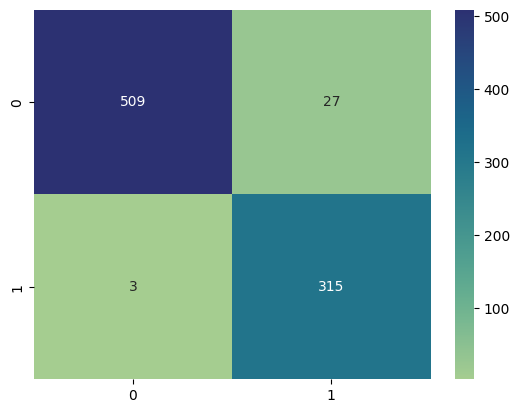

In [57]:
from sklearn.metrics import confusion_matrix


y_pred_en = clf_en.predict(X_test)

cm = confusion_matrix(y_test, y_pred_en)

sns.heatmap(cm, cmap='crest', annot=True, fmt='.0f');

### Classification Report

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en));

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       536
         1.0       0.92      0.99      0.95       318

    accuracy                           0.96       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.96      0.97       854

